# Function iagaussian

## Synopse

Generate a d-dimensional Gaussian image.

- **g = gaussian(s, mu, cov)**

  - **g**: Image. 


  - **s**: Image shape. (rows columns)
  - **mu**: Image. Mean vector. n-D point. Point of maximum value.
  - **cov**: Covariance matrix (symmetric and square).

In [3]:
import numpy as np

def gaussian(s, mu, cov):
    d = len(s)  # dimension
    n = np.prod(s) # n. of samples (pixels)
    x = np.indices(s).reshape( (d, n))
    xc = x - mu 
    k = 1. * xc * np.dot(np.linalg.inv(cov), xc)
    k = np.sum(k,axis=0) #the sum is only applied to the rows
    g = (1./((2 * np.pi)**(d/2.) * np.sqrt(np.linalg.det(cov)))) * np.exp(-1./2 * k)
    return g.reshape(s)

## Description

A n-dimensional Gaussian image is an image with a Gaussian distribution. It can be used to generate 
test patterns or Gaussian filters both for spatial and frequency domain. The integral of the gaussian function is 1.0.

## Examples

In [1]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python gaussian.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    
    %matplotlib inline
    import matplotlib.pyplot as plt

[NbConvertApp] Converting notebook gaussian.ipynb to python
[NbConvertApp] Writing 3260 bytes to gaussian.py


### Example 1 - Numeric 2-dimensional

In [2]:
if testing:
    f = ia.gaussian((8, 4), np.transpose([[3, 1]]), [[1, 0], [0, 1]])
    print('f=\n', np.array2string(f, precision=4, suppress_small=1))
    g = ia.normalize(f, [0, 255]).astype(np.uint8)
    print('g=\n', g)

f=
 [[ 0.0011  0.0018  0.0011  0.0002]
 [ 0.0131  0.0215  0.0131  0.0029]
 [ 0.0585  0.0965  0.0585  0.0131]
 [ 0.0965  0.1592  0.0965  0.0215]
 [ 0.0585  0.0965  0.0585  0.0131]
 [ 0.0131  0.0215  0.0131  0.0029]
 [ 0.0011  0.0018  0.0011  0.0002]
 [ 0.      0.0001  0.      0.    ]]
g=
 [[  1   2   1   0]
 [ 20  34  20   4]
 [ 93 154  93  20]
 [154 255 154  34]
 [ 93 154  93  20]
 [ 20  34  20   4]
 [  1   2   1   0]
 [  0   0   0   0]]


## Example 2 - one dimensional signal

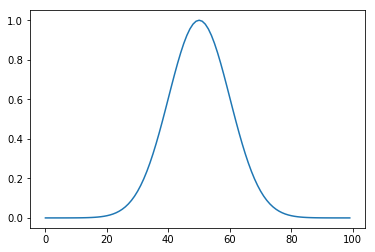

In [3]:
# note that for 1-D case, the tuple has extra ,
# and the covariance matrix must be 2-D
if testing:
    f = ia.gaussian( (100,), 50, [[10*10]]) 
    g = ia.normalize(f, [0,1])
    plt.plot(g)
    plt.show()

### Example 3 - two-dimensional image

""
""

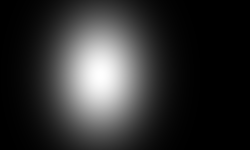

In [4]:
if testing:
    f = ia.gaussian((150,250), np.transpose([[75,100]]), [[40*40,0],[0,30*30]])
    g = ia.normalize(f, [0,255]).astype(np.uint8)
    ia.adshow(g)

## Example 4 - Numeric 3-dimensional

In [6]:
if testing:
    f = ia.gaussian((3,4,5), np.transpose([[1,2,3]]), [[1,0,0],[0,4,0],[0,0,9]])
    print('f=\n', np.array2string(f, precision=4, suppress_small=1))
    g = ia.normalize(f, [0,255]).astype(np.uint8)
    print('g=\n', g)

f=
 [[[ 0.0024  0.0031  0.0037  0.0039  0.0037]
  [ 0.0034  0.0045  0.0054  0.0057  0.0054]
  [ 0.0039  0.0051  0.0061  0.0064  0.0061]
  [ 0.0034  0.0045  0.0054  0.0057  0.0054]]

 [[ 0.0039  0.0051  0.0061  0.0064  0.0061]
  [ 0.0057  0.0075  0.0088  0.0093  0.0088]
  [ 0.0064  0.0085  0.01    0.0106  0.01  ]
  [ 0.0057  0.0075  0.0088  0.0093  0.0088]]

 [[ 0.0024  0.0031  0.0037  0.0039  0.0037]
  [ 0.0034  0.0045  0.0054  0.0057  0.0054]
  [ 0.0039  0.0051  0.0061  0.0064  0.0061]
  [ 0.0034  0.0045  0.0054  0.0057  0.0054]]]
g=
 [[[  0  23  40  47  40]
  [ 33  67  92 102  92]
  [ 47  86 115 125 115]
  [ 33  67  92 102  92]]

 [[ 47  86 115 125 115]
  [102 158 200 216 200]
  [125 189 237 254 237]
  [102 158 200 216 200]]

 [[  0  23  40  47  40]
  [ 33  67  92 102  92]
  [ 47  86 115 125 115]
  [ 33  67  92 102  92]]]


## Equation

$$    f(x) = \frac{1}{\sqrt{2 \pi} \sigma} exp\left[ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 \right]
$$

$$ f({\bf x}) = \frac{1}{(2 \pi)^{d/2}|\Sigma|^{1/2}} exp\left[ -\frac{1}{2}\left({\bf x} - \mu \right)^t\Sigma^{-1}\left({\bf x} - \mu \right)\right]
$$

## See Also

For a better understandig of this coding, consult `iagengauss`.

In [12]:
if testing:
    print('testing gaussian')
    #print(repr(np.floor(0.5 + 1E3*gaussian((8,4), [3,1], [[1,0],[0,1]])) / 1E3) == repr(np.array(
    #      [[ 0.001,  0.002,  0.001,  0.   ],
    #       [ 0.013,  0.022,  0.013,  0.003],
    #       [ 0.059,  0.097,  0.059,  0.013],
    #       [ 0.097,  0.159,  0.097,  0.022],
    #       [ 0.059,  0.097,  0.059,  0.013],
    #       [ 0.013,  0.022,  0.013,  0.003],
    #       [ 0.001,  0.002,  0.001,  0.   ],
    #       [ 0.   ,  0.   ,  0.   ,  0.   ]])))

testing gaussian
